# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arsenius Audley Wahyu Djatmiko
- **Email:** arseniuswahyu@gmail.com
- **ID Dicoding:** arsenius_audley

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan musim yang terjadi sepanjang tahun mempengaruhi jumlah penyewaan sepeda?
- Apakah cuaca dapat mempengaruhi jumlah penyewaan sepeda secara signifikan?
- Bagaimana distribusi jumlah penyewaan sepeda di pagi, siang, sore, dan malam hari?

## Import Semua Packages/Library yang Digunakan

Langkah pertama yang harus dilakukan adalah mengimpor library-library yang akan digunakan dalam analisis data, yaitu pandas, matplotlib, dan seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Dataset yang digunakan pada project akhir ini berupa 2 buah file dengan format CSV. Oleh karena itu kita menggunakan function dari library pandas yaitu read_csv() untuk membaca kedua berkas tersebut.

In [3]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Accessing Data

Data yang telah dikumpulkan tersebut harus diperiksa terlebih dahulu sebelum masuk ke tahap analisis. Proses ini bertujuan untuk mengidentifikasi masalah yang terdapat dalam data

Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df. Proses ini dapat dilakukan menggunakan method info()

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan secara lebih seksama, jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data **datetime**, bukan **object**.

Selanjutnya, untuk memastikan bahwa tidak ada missing value di dalam dataframe hour_df, kita akan menjalankan kode berikut ini 

In [13]:
print("jumlah missing values:")
print(day_df.isnull().sum())

jumlah missing values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Sekarang kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe().

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada day_df

Selanjutnya, kita akan menilai data pada hour_df. Pertama, gunakan method info() untuk memastikan tipe data tiap kolom dalam product_df telah sesuai.

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan secara lebih seksama, jumlah data pada hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data **datetime**, bukan **object**.

Selanjutnya, untuk memastikan bahwa tidak ada missing value di dalam dataframe hour_df, kita akan menjalankan kode berikut ini 

In [14]:
print("jumlah missing values:")
print(hour_df.isnull().sum())

jumlah missing values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Sekarang kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe().

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada day_df

### Cleaning Data

Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data pada dataframe day_df untuk kolom dteday.
Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom dteday dari **object** menjadi **datetime**. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas.

In [15]:
dteday_column = ["dteday"]
for column in dteday_column:
    day_df[column] = pd.to_datetime(day_df[column])


Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info()

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Data selanjutnya yang akan kita bersihkan adalah hour_df. Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data pada dataframe hour_df untuk kolom dteday.
Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom dteday dari **object** menjadi **datetime**. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas.

In [17]:
dteday_column = ["dteday"]
for column in dteday_column:
    hour_df[column] = pd.to_datetime(hour_df[column])

Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info()

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

Pada tahapan ini, kita akan melakukan eksplorasi data guna menjawab ketiga pertanyaan bisnis yang sudah kita definisikan sebelumnya.

### Eksplorasi Data day_df

Pertama, kita akan mengeksplorasi data day_df terlebih dahulu. Seperti yang kita ketahui, dataset ini memuat berbagai informasi terkait peminjaman sepeda yang dikumpulkan on daily basis, dengan jumlah 731 hari.


Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data day_df menggunakan method describe().


In [19]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berikut merupakan penjelasan dari isi setiap kolom dari day_df:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

Untuk menjawab pertanyaan bisnis yang pertama yaitu bagaimana perubahan musim mempengaruhi jumlah peminjaman sepeda. Selanjutnya, kita coba melihat persebaran jumlah peminjaman sepeda berdasarkan musim (season). Untuk melakukannya kita juga akan menggunakan method groupby() diikuti dengan method agg(). secara descending. Berikut contoh kode untuk melakukannya.


In [27]:
total_rentals_by_season = day_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

total_rentals_by_season

,instant,casual,registered,cnt
season,,,,
3,188,226091,835038,1061129
2,184,203522,715067,918589
4,178,129782,711831,841613
1,181,60622,410726,471348


tabel tersebut memberikan gambaran tentang kontribusi peminjaman sepeda dari pengguna kasual dan terdaftar dalam setiap musim.

Kemudian kita ingin plotnya dalam bentuk bar chart. 

<Figure size 800x600 with 0 Axes>

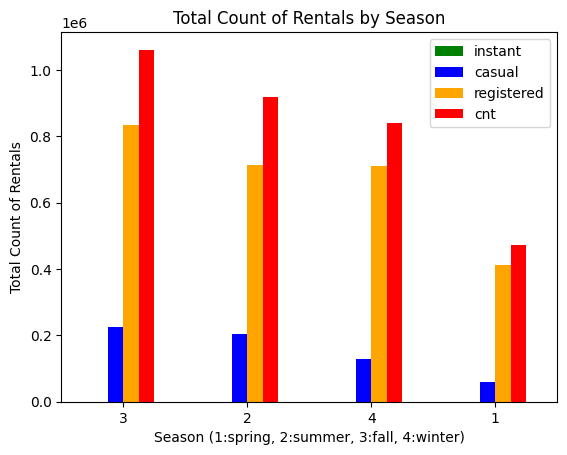

In [32]:
plt.figure(figsize=(8, 6))
total_rentals_by_season.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])

season_names = ['Spring', 'Summer', 'Fall', 'Winter']
plt.xlabel('Season (1:spring, 2:summer, 3:fall, 4:winter)')
plt.ylabel('Total Count of Rentals')
plt.title('Total Count of Rentals by Season')
plt.xticks(rotation = 0)
plt.show()

Selanjutnya kita juga ingin mengetahui rata-rata jumlah peminjaman untuk setiap musim dan membandingkannya. 

In [41]:
avg_rentals_by_season = day_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).sort_values(by="cnt", ascending=False)

avg_rentals_by_season

,instant,casual,registered,cnt
season,,,,
3,188,1202.611702,4441.691489,5644.303191
2,184,1106.097826,3886.233696,4992.331522
4,178,729.112360,3999.050562,4728.162921
1,181,334.928177,2269.204420,2604.132597


dan sama seperti sebelumnya, kita ingin memplotnya dalam bentuk bar chart.

<Figure size 800x600 with 0 Axes>

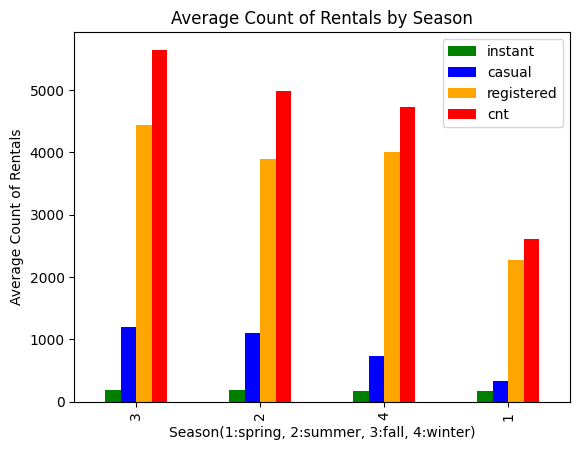

In [43]:
plt.figure(figsize=(8, 6))

avg_rentals_by_season.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Season(1:spring, 2:summer, 3:fall, 4:winter)')
plt.ylabel('Average Count of Rentals')
plt.title('Average Count of Rentals by Season')
plt.show()

Dapat kita lihat bahwa kedua bar chart tersebut memiliki hasil yang hampir mirip, menunjukkan bahwa peminjaman sepeda paling banyak terjadi di musim gugur, kemudian disusul musim panas, musim dingin dan terakhir musim semi.

Untuk menjawab pertanyaan kedua kita melakukan cara yang sama dengan yang telah kita lakukan untuk menjawab pertanyaan pertama. persebaran jumlah peminjaman sepeda berdasarkan cuaca (weather). Untuk melakukannya kita juga akan menggunakan method groupby() diikuti dengan method agg() secara descending.

In [44]:
total_rentals_by_weathersit = day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

avg_rentals_by_weathersit = day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).sort_values(by="cnt", ascending=False)

In [45]:
total_rentals_by_weathersit

,instant,casual,registered,cnt
weathersit,,,,
1,463,446346,1811606,2257952
2,247,169776,827082,996858
3,21,3895,33974,37869


In [46]:
avg_rentals_by_weathersit

,instant,casual,registered,cnt
weathersit,,,,
1,463,964.030238,3912.755940,4876.786177
2,247,687.352227,3348.510121,4035.862348
3,21,185.476190,1617.809524,1803.285714


Selanjutnya kita akan memplot chart dari kedua tabel tersebut

<Figure size 2000x2000 with 0 Axes>

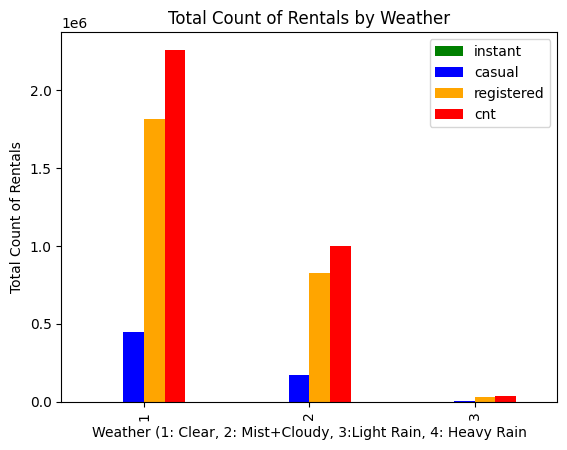

In [53]:
plt.figure(figsize=(20, 20))

total_rentals_by_weathersit.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Weather (1: Clear, 2: Mist+Cloudy, 3:Light Rain, 4: Heavy Rain')
plt.ylabel('Total Count of Rentals')
plt.title('Total Count of Rentals by Weather')
plt.show()

<Figure size 800x600 with 0 Axes>

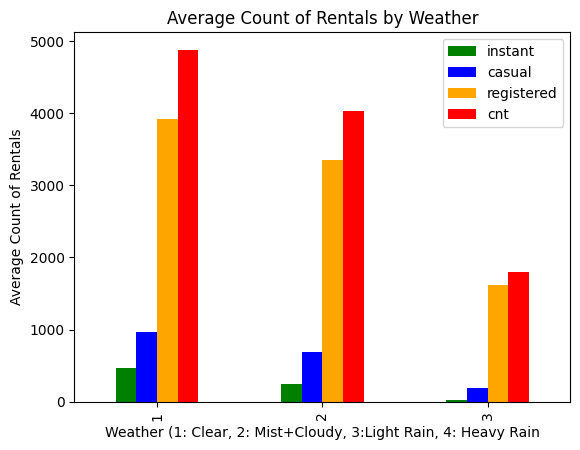

In [54]:
plt.figure(figsize=(8, 6))

avg_rentals_by_weathersit.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Weather (1: Clear, 2: Mist+Cloudy, 3:Light Rain, 4: Heavy Rain')
plt.ylabel('Average Count of Rentals')
plt.title('Average Count of Rentals by Weather')
plt.show()

Bisa dilihat dari tabel diatas juga, rata-rata dan total penminjaman sepeda terjadi saat cuaca cerah, disusul cuaca berawan, kemudian hujan rintik-rintik, dan tidak ada yang menyewa sepeda saat hujan deras

Selanjutnya untuk menjawab pertanyaan bisnis ketiga, kita perlu mencari tahu total dan rata-rata peminjaman berdasarkan jam dengan membaca data dari hour_df, lalu mengelompokkannya berdasarkan sum() dari 'cnt'

In [57]:
hourly_rentals_total = hour_df.groupby('hr')['cnt'].sum()
hourly_rentals_total

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

berikut untuk menghitung rata-ratanya, dan kita bulatkan dengan method round() agar hasil menjadi lebih masuk akal

In [70]:
hourly_rentals_avg = hour_df.groupby('hr')['cnt'].mean().round()
hourly_rentals_avg

hr
0      54.0
1      33.0
2      23.0
3      12.0
4       6.0
5      20.0
6      76.0
7     212.0
8     359.0
9     219.0
10    174.0
11    208.0
12    253.0
13    254.0
14    241.0
15    251.0
16    312.0
17    461.0
18    426.0
19    312.0
20    226.0
21    172.0
22    131.0
23     88.0
Name: cnt, dtype: float64

Terakhir, kita ingin melihat tren peminjaman sepeda sepanjang hari dari total maupun rata-rata

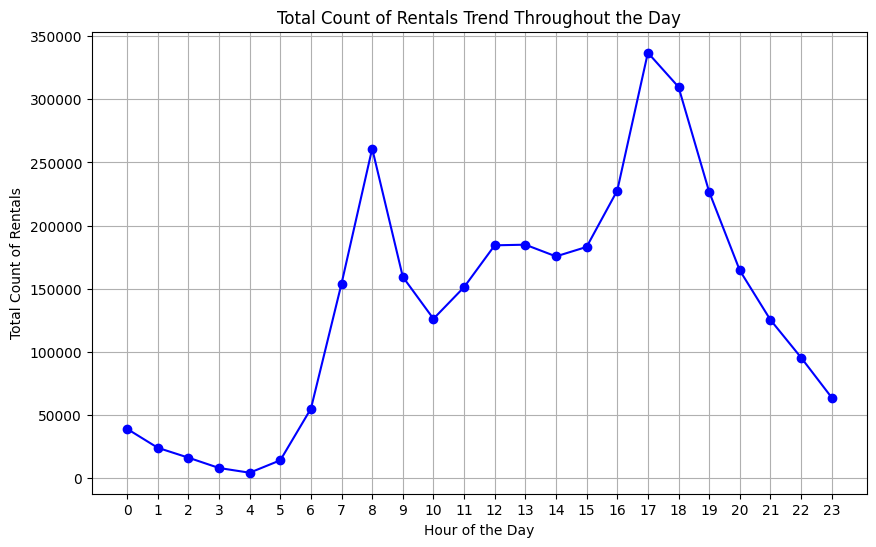

In [63]:
plt.figure(figsize=(10, 6))

hourly_rentals_total.plot(kind='line', marker='o', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Count of Rentals')
plt.title('Total Count of Rentals Trend Throughout the Day')
plt.xticks(hourly_rentals_total.index)
plt.grid(True)
plt.show()

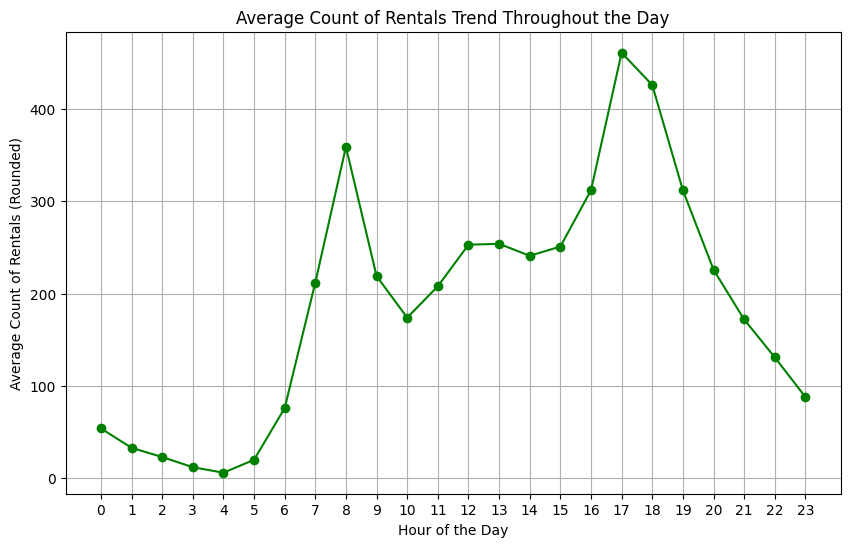

In [62]:
plt.figure(figsize=(10, 6))

hourly_rentals_avg.plot(kind='line', marker='o', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count of Rentals (Rounded)')
plt.title('Average Count of Rentals Trend Throughout the Day')
plt.xticks(hourly_rentals_avg.index)
plt.grid(True)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana perubahan musim yang terjadi sepanjang tahun mempengaruhi jumlah penyewaan sepeda?

<Figure size 800x600 with 0 Axes>

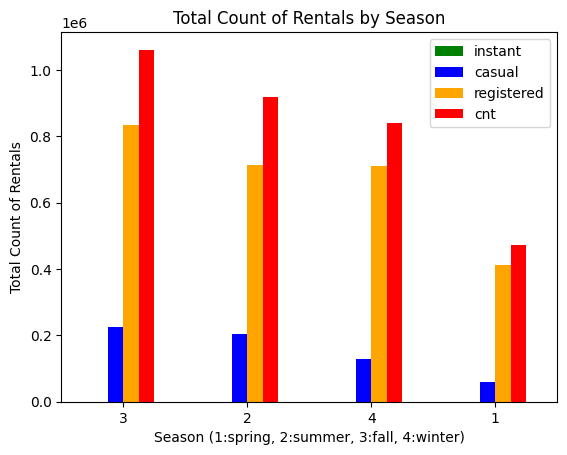

In [64]:
plt.figure(figsize=(8, 6))
total_rentals_by_season.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])

season_names = ['Spring', 'Summer', 'Fall', 'Winter']
plt.xlabel('Season (1:spring, 2:summer, 3:fall, 4:winter)')
plt.ylabel('Total Count of Rentals')
plt.title('Total Count of Rentals by Season')
plt.xticks(rotation = 0)
plt.show()

<Figure size 800x600 with 0 Axes>

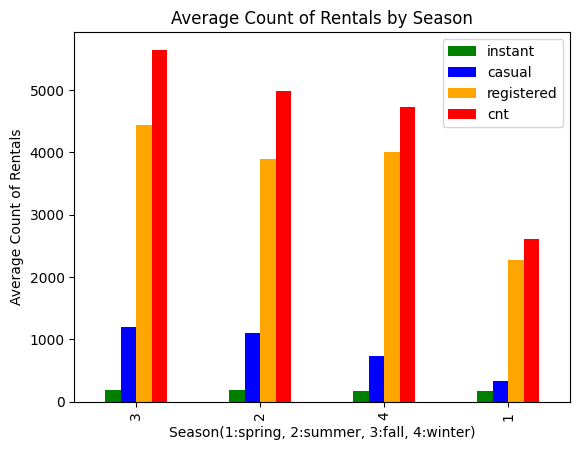

In [65]:
plt.figure(figsize=(8, 6))

avg_rentals_by_season.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Season(1:spring, 2:summer, 3:fall, 4:winter)')
plt.ylabel('Average Count of Rentals')
plt.title('Average Count of Rentals by Season')
plt.show()

Dari dua bar chart tersebut yang menunjukkan total dan rata-rata jumnlah peminjaman sepeda berdasarkan musim, dapat dilihat bahwa orang cenderung lebih memilih meminjam sepeda saat sedang musim gugur dan orang paling jarang meminjam pada musim semi.

### Pertanyaan 2: Apakah cuaca dapat mempengaruhi jumlah penyewaan sepeda secara signifikan?


<Figure size 2000x2000 with 0 Axes>

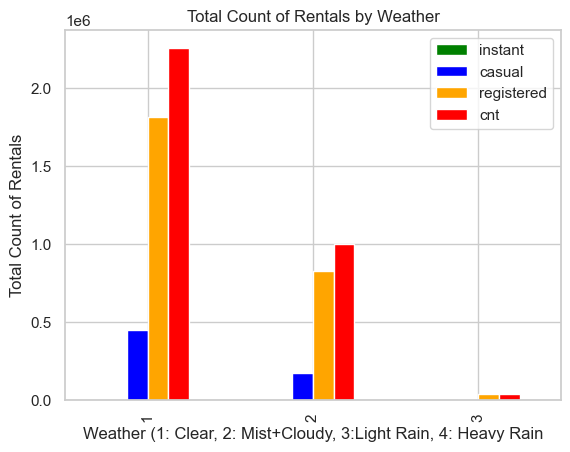

In [68]:
plt.figure(figsize=(20, 20))

total_rentals_by_weathersit.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Weather (1: Clear, 2: Mist+Cloudy, 3:Light Rain, 4: Heavy Rain')
plt.ylabel('Total Count of Rentals')
plt.title('Total Count of Rentals by Weather')
plt.show()

<Figure size 800x600 with 0 Axes>

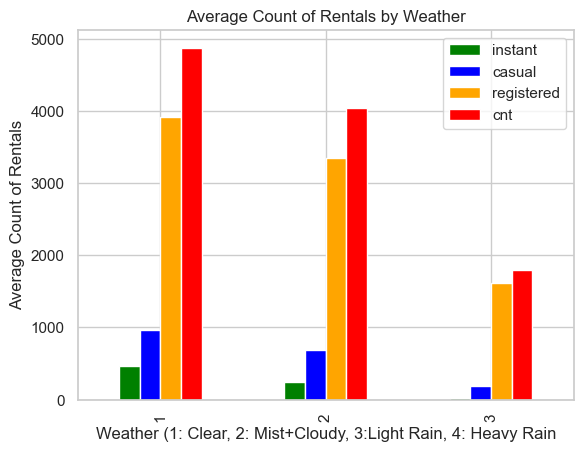

In [69]:
plt.figure(figsize=(8, 6))

avg_rentals_by_weathersit.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Weather (1: Clear, 2: Mist+Cloudy, 3:Light Rain, 4: Heavy Rain')
plt.ylabel('Average Count of Rentals')
plt.title('Average Count of Rentals by Weather')
plt.show()

Dari dua bar chart tersebut yang menunjukkan total dan rata-rata jumnlah peminjaman sepeda berdasarkan situasi cuaca saat itu, dapat dilihat bahwa orang cenderung lebih memilih meminjam sepeda saat sedang cuaca cerah, disusul saat sedikit mendung dan berkabut, kemudian saat hujan rintik-rintik dan berdasarkan data tidak ada orang yang meminjam sepeda saat hujan deras

### Pertanyaan 3 : Bagaimana tren penyewaan sepeda di pagi, siang, sore, dan malam hari?

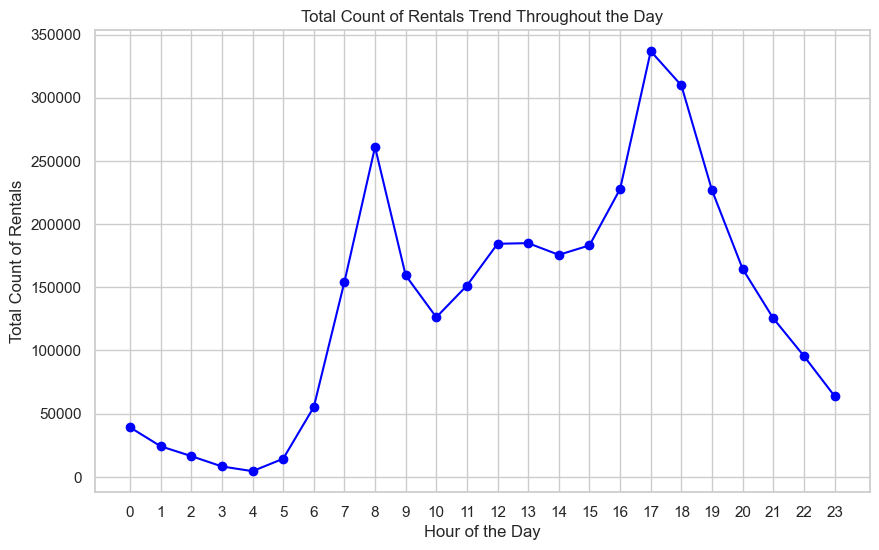

In [71]:
plt.figure(figsize=(10, 6))

hourly_rentals_total.plot(kind='line', marker='o', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Count of Rentals')
plt.title('Total Count of Rentals Trend Throughout the Day')
plt.xticks(hourly_rentals_total.index)
plt.grid(True)
plt.show()

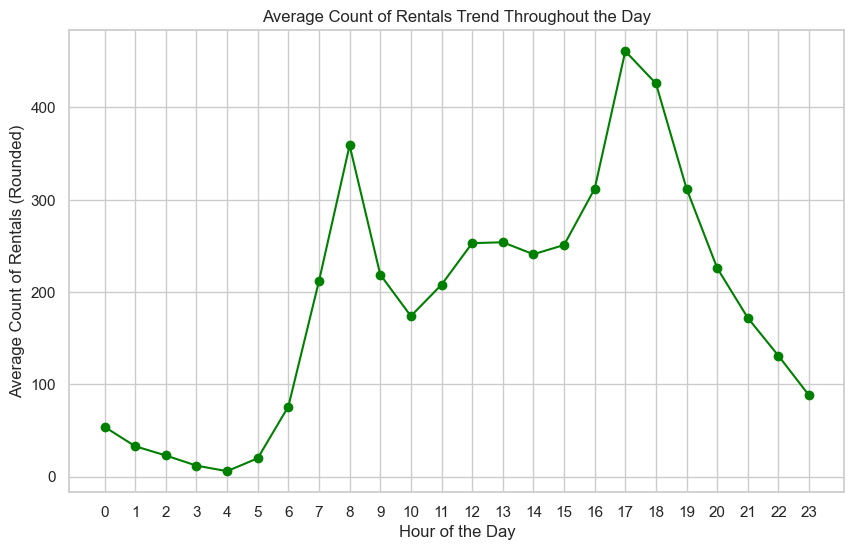

In [72]:
plt.figure(figsize=(10, 6))

hourly_rentals_avg.plot(kind='line', marker='o', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count of Rentals (Rounded)')
plt.title('Average Count of Rentals Trend Throughout the Day')
plt.xticks(hourly_rentals_avg.index)
plt.grid(True)
plt.show()

Dari kedua line chart tersebut kita dapat melihat tren peminjaman sepeda sepanjang hari dari jam 0-24, dan peminjaman sepeda paling banyak terjadi di jam 17.00 sore dan paling sedikit di jam 04.00 pagi.

## Conclusion

- Conclution pertanyaan 1 :
  Puncak peminjaman sepeda terjadi di musim gugur dan musim panas, sementara musim dingin dan musim semi lebih rendah dari kedua musim sebelumnya. Dari visualisasi data berupa bar chart juga telah menunjukkan bahwa peminjaman sepeda paling banyak terjadi saat musim gugur, kemudian disusul musim panas, musim dingin dan terakhir musim semi. Dari visualisasi tersebut bisa menjadi informasi dasar dalam menyusun rencana penyewaan sepeda yang akan dilakukan sesuai dengan musim-musim tertentu, agar memperoleh keuntungan maksimal.

- Conclution pertanyaan 2 :
  Puncak peminjaman sepeda terjadi di saat cuaca cerah, sementara cuaca mendung dan hujan rintik-rintik menunjukkan jumlah peminjaman sepeda yang lebih rendah bahkan tidak ada peminjaman saat cuaca hujan deras. Dari visualisasi data tersebut bisa menjadi informasi dasar bahwa cuaca berpengaruh sangat signifikan dalam jumlah peminjaman sepeda, dan informasi ini dapat menjadi data pendukung dalam menyusun rencana cadangan saat cuaca sedang tidak menentu, agar memperoleh keuntungan maksimal.
  
- Conclution pertanyaan 3 :
  Puncak peminjaman sepeda terjadi saat sore hari dan paling sedikit di dini hari. Dari tren tersebut kita dapat menyusun rencana lebih lanjut seperti
  membuka penyewaan sepeda dari siang sampai sore hari dan jumlah sepeda yang harus tersedia saat sore hari agar dapat memperoleh keuntungan maksimal.
